In [3]:
import matplotlib.image as mp
import numpy as np

path = "jiao.jpg"
img = mp.imread(path)
print(type(img))

<class 'numpy.ndarray'>


In [4]:
print(img.shape)

(4000, 6000, 3)


In [3]:
def incr_contr(point):
    t_value = int(2*(point-127)+127)
    if t_value < 0:
        return 0
    elif t_value > 255:
        return 255
    else:
        return t_value

def process1(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            result[i][j][0]=incr_contr(image[i][j][0])
            result[i][j][1]=incr_contr(image[i][j][1])
            result[i][j][2]=incr_contr(image[i][j][2])
    return result
            

In [4]:
output = process1(img)
path_out = "1.jpg"
mp.imsave(path_out,output)

In [9]:
def gamma_compression(point,gamma):
    return int(255*((point/255)**gamma))

def process2(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            result[i][j][0]=gamma_compression(image[i][j][0],0.5)
            result[i][j][1]=gamma_compression(image[i][j][1],0.5)
            result[i][j][2]=gamma_compression(image[i][j][2],0.5)
    return result

In [10]:
output = process2(img)
path_out = "2.jpg"
mp.imsave(path_out,output)

In [44]:
def process3(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            avg = int(0.3*image[i][j][0]+0.59*image[i][j][1]+0.11*image[i][j][2])
            result[i][j][0]=avg
            result[i][j][1]=avg
            result[i][j][2]=avg
    return result

In [45]:
output = process3(img)
path_out = "3.jpg"
mp.imsave(path_out,output)

In [18]:
def process3a(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            avg = int(0.33*image[i][j][0]+0.33*image[i][j][1]+0.33*image[i][j][2])
            result[i][j][0]=avg
            result[i][j][1]=avg
            result[i][j][2]=avg
    return result

In [19]:
output = process3a(img)
path_out = "3a.jpg"
mp.imsave(path_out,output)

In [5]:
def process4(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            r = image[i][j][0]
            g = image[i][j][1]
            b = image[i][j][2]
            result[i][j][0]=min(255,int(0.393 * r + 0.769 * g + 0.189 * b))
            result[i][j][1]=min(255,int(0.349 * r + 0.686 * g + 0.168 * b))
            result[i][j][2]=min(255,int(0.272 * r + 0.534 * g + 0.131 * b))
    return result

In [8]:
output = process4(img)
path_out = "4.jpg"
mp.imsave(path_out,output)

In [6]:
def process4a(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            r = image[i][j][0]
            g = image[i][j][1]
            b = image[i][j][2]
            result[i][j][0]=min(255,int(0.4 * r + 0.8 * g + 0.2 * b))
            result[i][j][1]=min(255,int(0.3 * r + 0.7 * g + 0.2 * b))
            result[i][j][2]=min(255,int(0.3 * r + 0.5 * g + 0.1 * b))
    return result

In [7]:
output = process4a(img)
path_out = "4a.jpg"
mp.imsave(path_out,output)

In [8]:
def process6(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            r = image[i][j][0]
            g = image[i][j][1]
            b = image[i][j][2] 
            result[i][j][0]=255-r
            result[i][j][1]=255-g 
            result[i][j][2]=255-b  
    return result

In [9]:
output = process6(img)
path_out = "6.jpg"
mp.imsave(path_out,output)

In [3]:
def b_hist(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros((256,))
    for i in range(height):
        for j in range(width):
            result[image[i][j][2]]+=1
    return result

def r_hist(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros((256,))
    for i in range(height):
        for j in range(width):
            result[image[i][j][0]]+=1
    return result

def g_hist(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros((256,))
    for i in range(height):
        for j in range(width):
            result[image[i][j][1]]+=1
    return result

In [4]:
def cumulative_hist(hist,size):
    result = np.zeros((256,))
    tot = 0
    for i in range(256):
        tot += hist[i]
        result[i] = tot*1.0/size
    return result

def hist_matching(src,trg):
    result = np.zeros((256,))
    for i in range(256):
        for j in range(256):
            if src[i]<=trg[j] or j==255:
                result[i]=j
                break
    return result

In [5]:
trg = mp.imread("star.jpg")

In [6]:
src_r = r_hist(img)
src_g = g_hist(img)
src_b = b_hist(img)

trg_r = r_hist(trg)
trg_g = g_hist(trg)
trg_b = b_hist(trg)

In [7]:
size1 = img.shape[0]*img.shape[1]
size2 = trg.shape[0]*trg.shape[1]

csrc_r = cumulative_hist(src_r,size1)
csrc_g = cumulative_hist(src_g,size1)
csrc_b = cumulative_hist(src_b,size1)

ctrg_r = cumulative_hist(trg_r,size2)
ctrg_g = cumulative_hist(trg_g,size2)
ctrg_b = cumulative_hist(trg_b,size2)

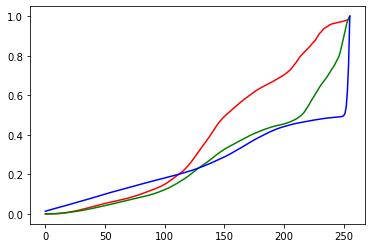

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(256)
plt.plot(x,csrc_r,color="red")
plt.plot(x,csrc_g,color="green")
plt.plot(x,csrc_b,color="blue")

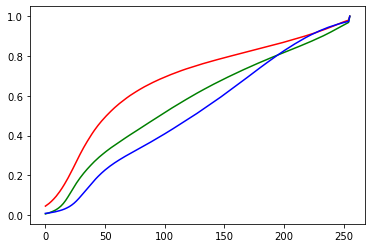

In [9]:
x=np.arange(256)
plt.plot(x,ctrg_r,color="red")
plt.plot(x,ctrg_g,color="green")
plt.plot(x,ctrg_b,color="blue")

In [10]:
r_LUT = hist_matching(csrc_r,ctrg_r)
g_LUT = hist_matching(csrc_g,ctrg_g)
b_LUT = hist_matching(csrc_b,ctrg_b)

In [11]:
def calc(LUT,point):
    return LUT[point]

def process5(image):
    height = image.shape[0]
    width = image.shape[1]
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            result[i][j][0] = calc(r_LUT,image[i][j][0])
            result[i][j][1] = calc(g_LUT,image[i][j][1])
            result[i][j][2] = calc(b_LUT,image[i][j][2])
    return result   

In [12]:
print(r_LUT,g_LUT,b_LUT)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   1.   2.   2.   2.   3.   3.   3.   3.   4.
   4.   4.   4.   5.   5.   5.   5.   6.   6.   6.   6.   7.   7.   7.
   7.   8.   8.   8.   8.   9.   9.   9.  10.  10.  10.  10.  11.  11.
  11.  12.  12.  12.  12.  13.  13.  13.  13.  14.  14.  14.  15.  15.
  15.  16.  16.  16.  17.  17.  17.  18.  18.  19.  19.  20.  20.  20.
  21.  21.  22.  22.  22.  23.  23.  24.  25.  25.  26.  27.  27.  28.
  29.  29.  30.  31.  32.  32.  33.  34.  35.  36.  36.  37.  38.  39.
  40.  41.  42.  43.  45.  46.  47.  48.  49.  50.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  95.  96.  97.
  98. 

In [14]:
output = process5(img)
path_out = "5.jpg"
mp.imsave(path_out,output)

In [15]:
dst_r = r_hist(output)
dst_g = g_hist(output)
dst_b = b_hist(output)

In [16]:
cdst_r = cumulative_hist(dst_r,size1)
cdst_g = cumulative_hist(dst_g,size1)
cdst_b = cumulative_hist(dst_b,size1)

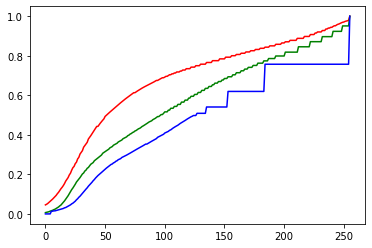

In [17]:
x=np.arange(256)
plt.plot(x,cdst_r,color="red")
plt.plot(x,cdst_g,color="green")
plt.plot(x,cdst_b,color="blue")

In [24]:
import matplotlib.pyplot as plt
x=np.arange(256)

In [25]:
yr = r_hist(img)
yg = g_hist(img)
yb = b_hist(img)

[2.320000e+02 3.090000e+02 7.550000e+02 9.680000e+02 1.905000e+03
 3.492000e+03 3.257000e+03 5.909000e+03 4.254900e+04 4.096600e+04
 2.649800e+04 6.676800e+04 1.065250e+05 1.454050e+05 1.535820e+05
 1.514700e+05 1.436250e+05 1.373090e+05 1.354080e+05 1.368140e+05
 1.376200e+05 1.363950e+05 1.344120e+05 1.316990e+05 1.329160e+05
 1.343470e+05 1.330540e+05 1.285980e+05 1.218760e+05 1.153030e+05
 1.095530e+05 1.058160e+05 1.033570e+05 1.036520e+05 1.031800e+05
 1.017680e+05 1.013070e+05 1.012470e+05 1.039930e+05 1.082560e+05
 1.134190e+05 1.203160e+05 1.268430e+05 1.325990e+05 1.379390e+05
 1.418680e+05 1.454250e+05 1.471070e+05 1.454450e+05 1.443900e+05
 1.433530e+05 1.426860e+05 1.428460e+05 1.428330e+05 1.428580e+05
 1.422860e+05 1.420270e+05 1.423020e+05 1.415870e+05 1.418780e+05
 1.429930e+05 1.418870e+05 1.422430e+05 1.410090e+05 1.408490e+05
 1.393390e+05 1.377490e+05 1.357120e+05 1.326810e+05 1.300460e+05
 1.284000e+05 1.266240e+05 1.245240e+05 1.235830e+05 1.222190e+05
 1.213220e

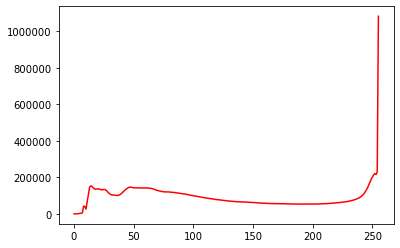

In [26]:
plt.plot(x,yr,color="red")

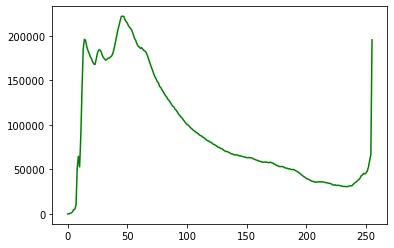

In [27]:
plt.plot(x,yg,color="green")

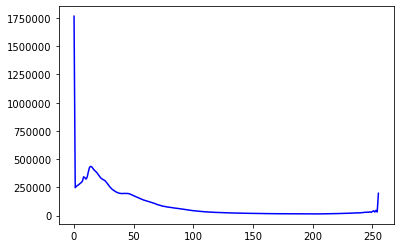

In [28]:
plt.plot(x,yb,color="blue")

In [30]:
path_t = "ori.jpg"
img_t = mp.imread(path_t)
yrt = r_hist(img_t)
ygt = g_hist(img_t)
ybt = b_hist(img_t)

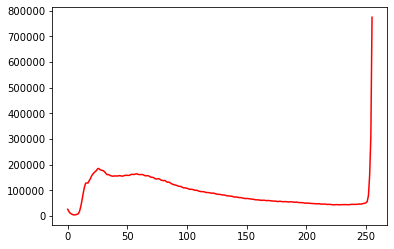

In [31]:
plt.plot(x,yrt,color="red")

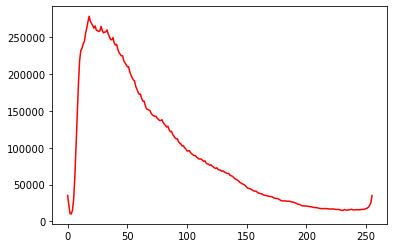

In [32]:
plt.plot(x,ygt,color="red")

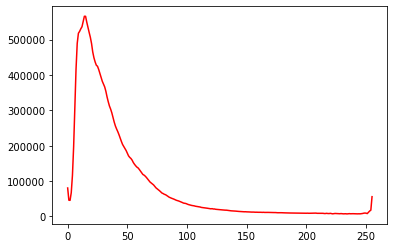

In [33]:
plt.plot(x,ybt,color="red")